In [48]:
import os

In [94]:
train=os.listdir("/resources/CNNs/Train")
test=os.listdir("/resources/CNNs/Test")


In [95]:
train.remove('.ipynb_checkpoints')

In [96]:
test.remove('.ipynb_checkpoints')

ValueError: list.remove(x): x not in list

In [97]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from keras.preprocessing import image

In [98]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_images = []
train_labels=[]
for i in train:
    img = image.load_img("/resources/CNNs/Train/"+i, target_size=(64,64,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_images.append(img)
    if i[0:3]=="GUN":
        train_labels.append(1)
    else:
        train_labels.append(0)
        
        


In [99]:
train[3]

'GUN_76.jpg'

In [100]:
train_labels[3]

1

In [101]:
#Removing duplicate images
# for i in test:
#     for j in train:
#         if(i==j):
#             print(i)
#             path="/resources/CNNs/Train/"+i
#             !rm $path

In [102]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
test_images = []
test_labels=[]
for i in train:
    img = image.load_img("/resources/CNNs/Train/"+i, target_size=(64,64,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_images.append(img)
    if i[0:3]=="GUN":
        test_labels.append(1)
    else:
        test_labels.append(0)
        
        


In [103]:
import numpy as np
train_images=np.array(train_images)
test_images=np.array(test_images)

In [104]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

Text(0.5, 1.0, 'Ground Truth : 1')

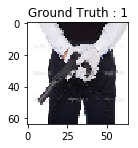

In [105]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:])
plt.title("Ground Truth : {}".format(train_labels[0]))

Text(0.5, 1.0, 'Ground Truth : 0')

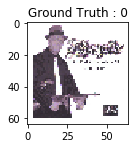

In [106]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[10,:,:])
plt.title("Ground Truth : {}".format(train_labels[10]))

In [107]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

In [108]:
input_shape

(64, 64, 3)

In [109]:
train.shape

AttributeError: 'list' object has no attribute 'shape'

In [110]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


In [111]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [112]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [113]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))


    return model

In [117]:
model = createModel()
batch_size = 5
epochs = 50
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 64)        0         
__________

In [115]:
model.metrics_names

['loss', 'acc']

In [118]:
model.evaluate(test_data, test_labels_one_hot)

177/177 [==============================] - 2s 9ms/step


[0.2568605284990564, 0.9152542379616344]

## Check the loss and accuracy curves

In [119]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss Curves')

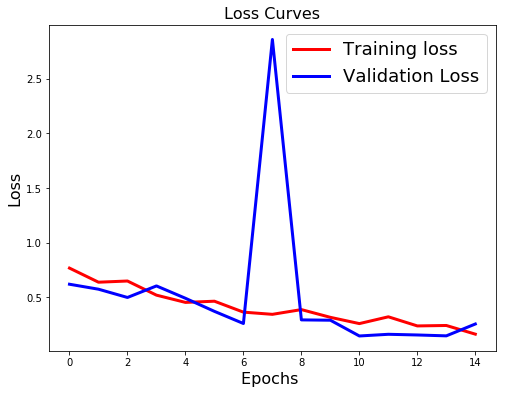

In [120]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

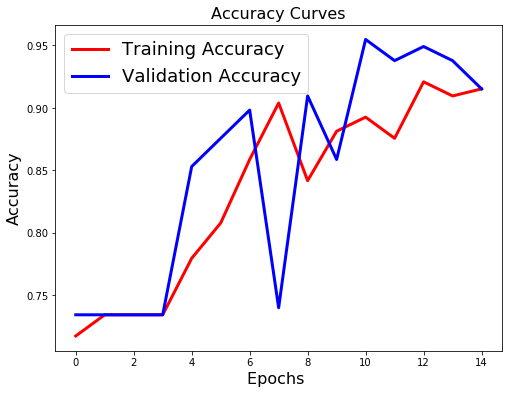

In [121]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [137]:
model.predict(test_images)[0]

array([0.00252295, 0.997477  ], dtype=float32)

# Data Augementation

In [136]:
from keras.preprocessing.image import ImageDataGenerator

model2 = createModel()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 5
epochs = 10
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


# datagen.fit(train_data)

# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)

model2.evaluate(test_data, test_labels_one_hot)

Epoch 1/10
36/36 [==============================] - 8s 227ms/step - loss: 0.7577 - acc: 0.7140 - val_loss: 0.6168 - val_acc: 0.7345
Epoch 2/10
36/36 [==============================] - 7s 204ms/step - loss: 0.6337 - acc: 0.7388 - val_loss: 0.5768 - val_acc: 0.7345
Epoch 3/10
36/36 [==============================] - 7s 197ms/step - loss: 0.6216 - acc: 0.7388 - val_loss: 0.5746 - val_acc: 0.7345
Epoch 4/10
36/36 [==============================] - 7s 197ms/step - loss: 0.6073 - acc: 0.7388 - val_loss: 0.5359 - val_acc: 0.7345
Epoch 5/10
36/36 [==============================] - 7s 192ms/step - loss: 0.5423 - acc: 0.7388 - val_loss: 0.4669 - val_acc: 0.7345
Epoch 6/10
36/36 [==============================] - 7s 196ms/step - loss: 0.4961 - acc: 0.7443 - val_loss: 0.4996 - val_acc: 0.8305
Epoch 7/10
36/36 [==============================] - 7s 195ms/step - loss: 0.5658 - acc: 0.7443 - val_loss: 0.3771 - val_acc: 0.8023
Epoch 8/10
36/36 [==============================] - 7s 196ms/step - loss: 0.

[0.4245710893202636, 0.8870056500542636]

In [143]:
model2.get_config()

[{'class_name': 'Conv2D',
  'config': {'name': 'conv2d_55',
   'trainable': True,
   'batch_input_shape': (None, 64, 64, 3),
   'dtype': 'float32',
   'filters': 32,
   'kernel_size': (3, 3),
   'strides': (1, 1),
   'padding': 'same',
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}},
 {'class_name': 'Conv2D',
  'config': {'name': 'conv2d_56',
   'trainable': True,
   'filters': 32,
   'kernel_size': (3, 3),
   'strides': (1, 1),
   'padding': 'valid',
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'activation': 'relu',
   'use_bias': T

In [145]:
!wget https://github.com/aayushkubb/learnopencv/tree/master/Keras-Transfer-Learning/clean-dataset/train

--2019-02-18 18:34:37--  https://github.com/aayushkubb/learnopencv/tree/master/Keras-Transfer-Learning/clean-dataset/train
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train’

train                   [ <=>                  ]  52.63K  --.-KB/s   in 0.04s  

2019-02-18 18:34:37 (1.16 MB/s) - ‘train’ saved [53895]

